**LIBRARY DECLARATION**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

**READING DATA**

In [ ]:
ma=pd.read_csv('/content/sample_data/matches.csv') #"C:\Users\Personal\Desktop\BIG DATA Assignments\matches.csv"


In [ ]:
de=pd.read_csv('/content/sample_data/deliveries.csv') # "C:\Users\Personal\Desktop\BIG DATA Assignments\matches.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ma.shape

(636, 18)

In [ ]:
de.shape

(150460, 21)

In [ ]:
ma.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [ ]:
de.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


**CLEANING AND TRANSFORMATION**

In [ ]:
ma=ma.drop(['umpire3'],axis=1)

In [ ]:
ma.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.471087,0.024281,-0.010263,-0.015510
season,0.471087,1.000000,0.004170,-0.016815,-0.000708
dl_applied,0.024281,0.004170,1.000000,-0.010893,-0.011640
win_by_runs,-0.010263,-0.016815,-0.010893,1.000000,-0.565181
win_by_wickets,-0.015510,-0.000708,-0.011640,-0.565181,1.000000


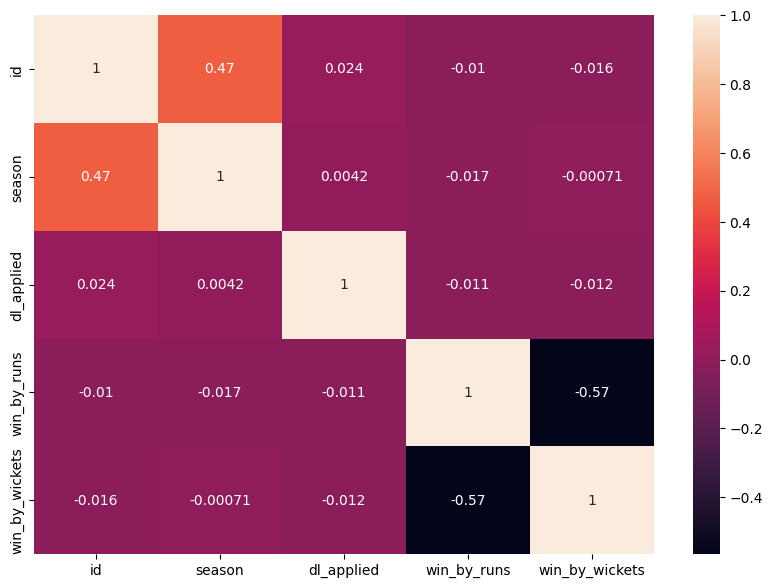

In [ ]:
plt.figure(figsize = (10,7))
sb.heatmap(ma.corr(), annot = True)
plt.show()

In [ ]:
ma.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [ ]:
ma= ma.dropna(axis = 0, how ='any')


In [ ]:
ma.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
 ma.shape

(625, 17)

In [ ]:
ma['player_of_match'].fillna(ma['player_of_match'].mode()[0], inplace=True)
ma['winner'].fillna(ma['winner'].mode()[0], inplace=True)
ma['umpire1'].fillna(ma['umpire1'].mode()[0], inplace=True)
ma['umpire2'].fillna(ma['umpire2'].mode()[0], inplace=True)
ma['city'].fillna(ma['city'].mode()[0], inplace=True)

In [ ]:
de['player_dismissed'].fillna('None',inplace=True)
de['dismissal_kind'].fillna('None',inplace=True)
de['fielder'].fillna('None',inplace=True)

In [ ]:
de.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

**VISUALIZATION**

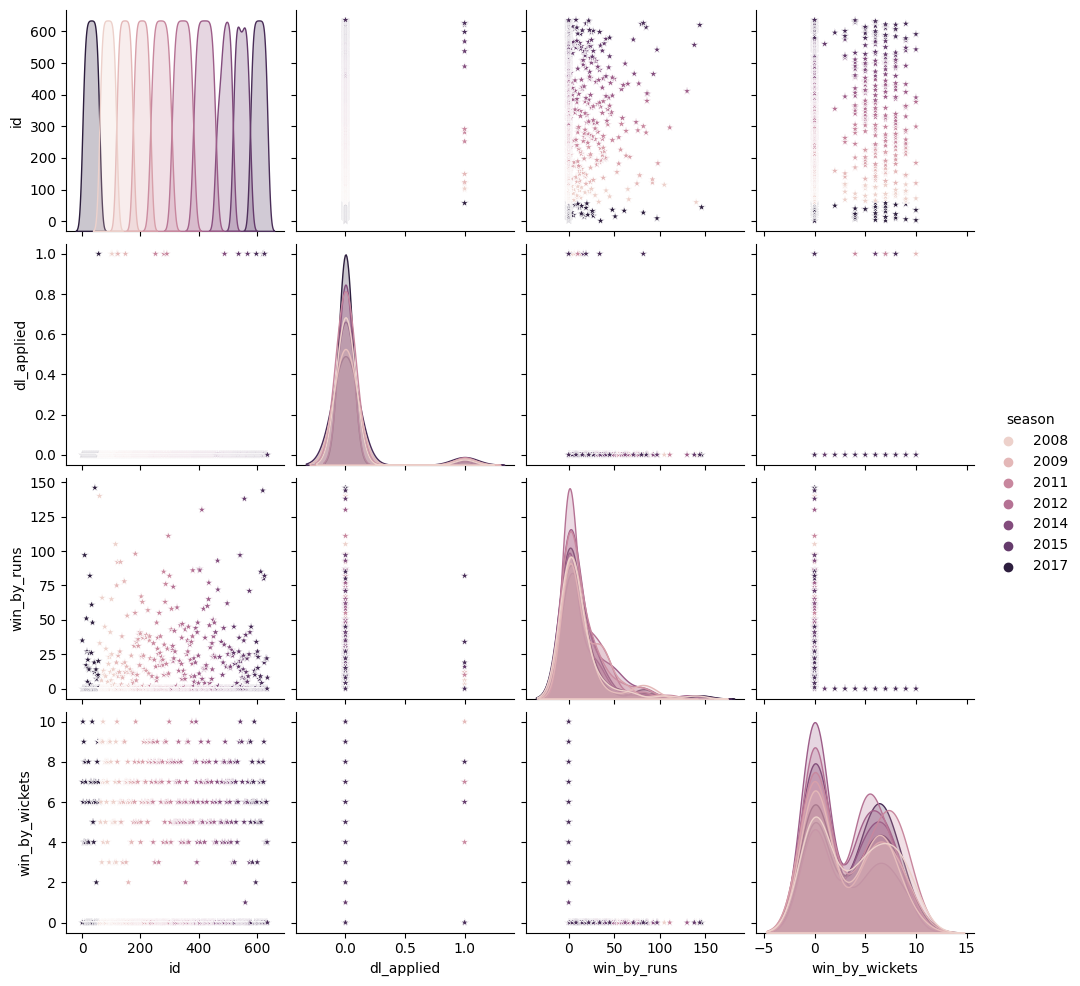

In [ ]:
g = sb.pairplot(ma, markers='*',hue='season')
plt.show()

In [ ]:
de.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001033,0.004365,-0.002464,-0.001220,-0.004850,-0.004662,-0.004324,-0.005849,-0.000972,0.006273,-0.008833,0.004366
inning,0.001033,1.000000,-0.051496,-0.003618,0.091904,0.001055,-0.000395,-0.001385,0.000389,0.003763,-0.005668,0.000132,-0.005680
over,0.004365,-0.051496,1.000000,-0.010953,-0.037394,-0.016226,0.013669,-0.005907,0.015717,-0.001055,0.089945,-0.007649,0.088896
ball,-0.002464,-0.003618,-0.010953,1.000000,-0.001258,-0.005931,0.006755,-0.004449,0.002350,0.000774,0.008944,-0.004176,0.008086
is_super_over,-0.001220,0.091904,-0.037394,-0.001258,1.000000,-0.001155,0.001516,0.001717,0.014389,-0.000085,0.011497,0.003613,0.012377
wide_runs,-0.004850,0.001055,-0.016226,-0.005931,-0.001155,1.000000,-0.006230,-0.016186,-0.008703,0.013633,-0.111690,0.723726,0.047354
bye_runs,-0.004662,-0.000395,0.013669,0.006755,0.001516,-0.006230,1.000000,-0.004751,-0.002555,-0.000156,-0.032785,0.318850,0.037402
legbye_runs,-0.004324,-0.001385,-0.005907,-0.004449,0.001717,-0.016186,-0.004751,1.000000,-0.006637,-0.000405,-0.085177,0.557403,0.037322
noball_runs,-0.005849,0.000389,0.015717,0.002350,0.014389,-0.008703,-0.002555,-0.006637,1.000000,-0.000218,0.000272,0.196724,0.043722
penalty_runs,-0.000972,0.003763,-0.001055,0.000774,-0.000085,0.013633,-0.000156,-0.000405,-0.000218,1.000000,-0.002795,0.061842,0.010843


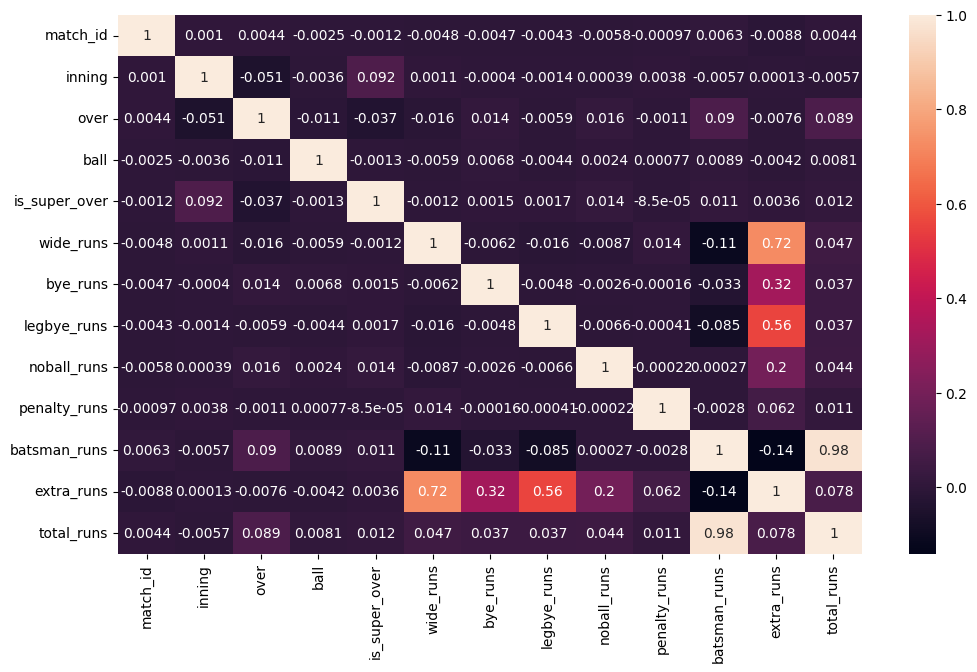

In [ ]:
plt.figure(figsize = (12,7))
sb.heatmap(de.corr(),annot=True)
plt.show()

In [ ]:
r=pd.merge(de,ma,left_on='match_id',right_on='id',how='outer')
r

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0.0,Sunrisers Hyderabad,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,bat,normal,0.0,Sunrisers Hyderabad,8.0,0.0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,bat,normal,0.0,Sunrisers Hyderabad,8.0,0.0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,bat,normal,0.0,Sunrisers Hyderabad,8.0,0.0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,bat,normal,0.0,Sunrisers Hyderabad,8.0,0.0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford


**2a.Maximum Toss Winners**

In [ ]:
a=ma['toss_winner'].value_counts()
a

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [ ]:
b=a.to_dict()
b

{'Mumbai Indians': 83,
 'Kolkata Knight Riders': 77,
 'Delhi Daredevils': 71,
 'Royal Challengers Bangalore': 67,
 'Kings XI Punjab': 67,
 'Chennai Super Kings': 66,
 'Rajasthan Royals': 61,
 'Deccan Chargers': 43,
 'Sunrisers Hyderabad': 34,
 'Pune Warriors': 20,
 'Gujarat Lions': 15,
 'Kochi Tuskers Kerala': 8,
 'Rising Pune Supergiants': 7,
 'Rising Pune Supergiant': 6}

<BarContainer object of 14 artists>

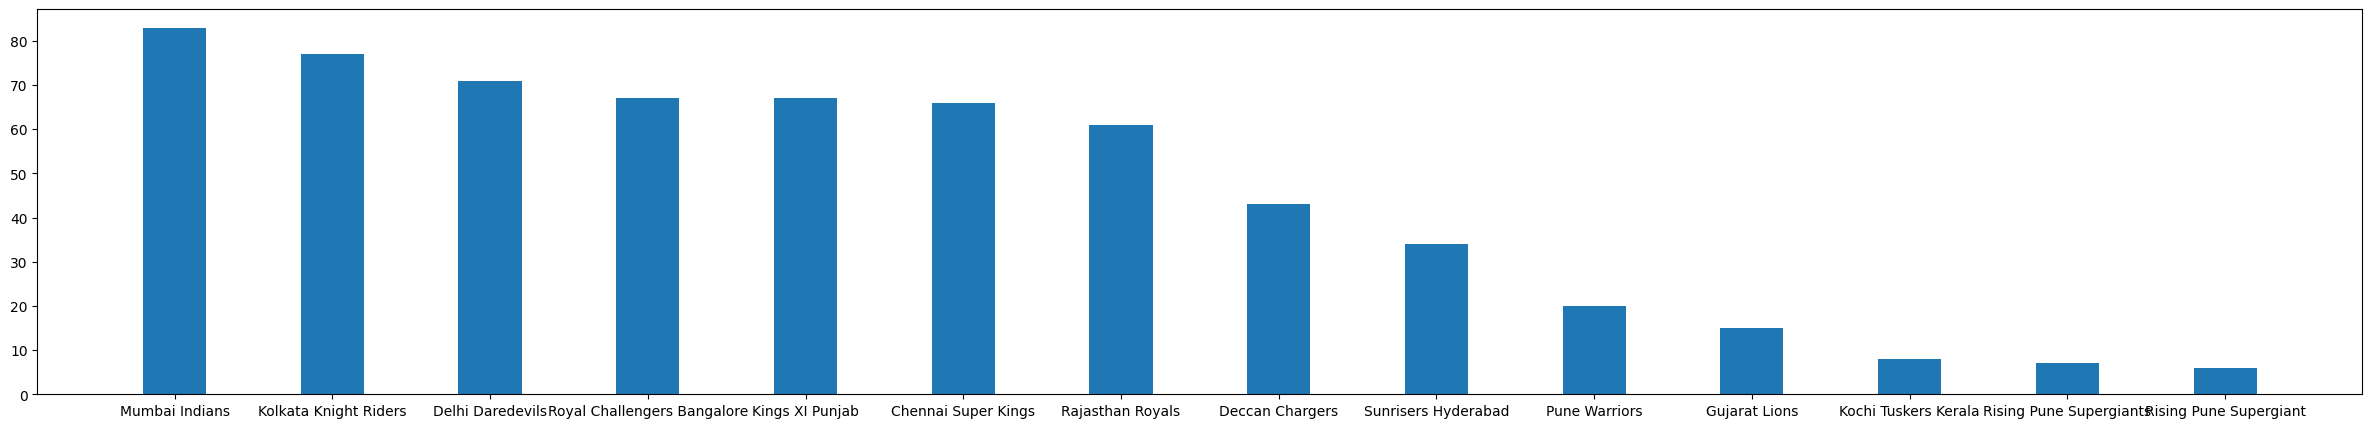

In [ ]:
plt.figure(figsize = (30,5))
plt.xticks(range(len(b)),list(b.keys()))
plt.bar(range(len(b)), list(b.values()), align='center',width=0.4)

**2b.	Total Matches vs Wins for Teams**

In [ ]:
t11=ma['winner'].value_counts()
t11


Mumbai Indians                 92
Kolkata Knight Riders          77
Chennai Super Kings            77
Royal Challengers Bangalore    71
Kings XI Punjab                69
Rajasthan Royals               63
Delhi Daredevils               61
Sunrisers Hyderabad            40
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [ ]:
t11=t11.to_dict()

In [ ]:
p=ma['team1'].value_counts()

In [ ]:
q=ma['team2'].value_counts()

In [ ]:
k=p.to_dict()


In [ ]:
l=q.to_dict()

In [ ]:
from collections import Counter
matches=Counter(k)+Counter(l)
matches

Counter({'Mumbai Indians': 154,
         'Kings XI Punjab': 147,
         'Chennai Super Kings': 129,
         'Kolkata Knight Riders': 147,
         'Royal Challengers Bangalore': 147,
         'Delhi Daredevils': 142,
         'Rajasthan Royals': 116,
         'Sunrisers Hyderabad': 74,
         'Deccan Chargers': 75,
         'Pune Warriors': 45,
         'Gujarat Lions': 30,
         'Rising Pune Supergiant': 16,
         'Kochi Tuskers Kerala': 14,
         'Rising Pune Supergiants': 14})

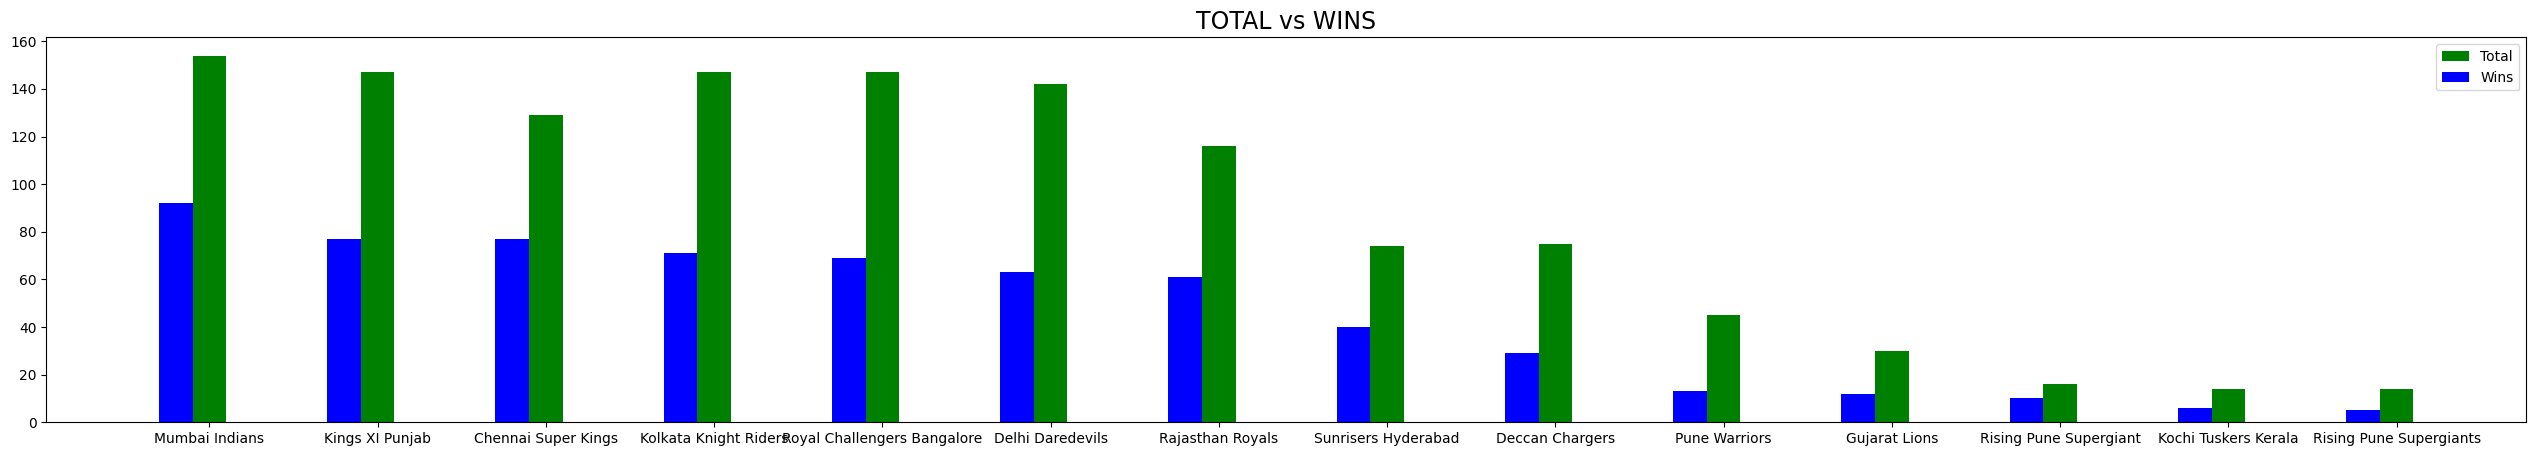

In [ ]:
plt.figure(figsize=(32,5))
X= np.arange(len(matches))
ax = plt.subplot(111)
ax.bar(X, matches.values(), width=0.2, color='g', align='center')
ax.bar(X-0.2, t11.values(), width=0.2, color='b', align='center')
ax.legend(('Total','Wins'))
plt.xticks(X, matches.keys())
plt.title("TOTAL vs WINS", fontsize=17)
plt.show()

**2c.	Is Toss Winner Also the Match Winner?**

In [ ]:
ss = ma['toss_winner'] == ma['winner']
ss.groupby(ss).size()


False    304
True     321
dtype: int64

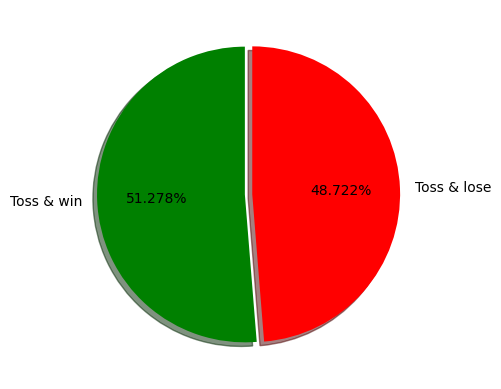

In [ ]:
df_fil=ma[ma['toss_winner']==ma['winner']]
slices=[len(df_fil),(626-len(df_fil))]
plt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0.05,0),autopct='%1.3f%%',colors=['g','r'])
#fig = plt.gcf()
#fig.set_size_inches(6,6)
plt.show()

<Axes: ylabel='count'>

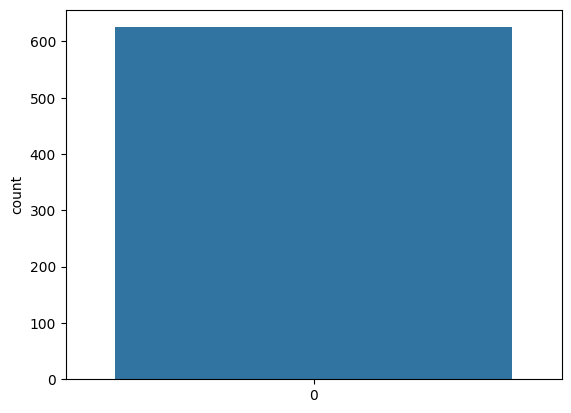

In [ ]:
sb.countplot(ma['toss_winner'] == ma['winner'])

**2d.	Sixes and Fours across the Season**

In [ ]:
u=r[r['batsman_runs']==4][r['season']==2008]
u

<ipython-input-40-1b4b2aeb1329>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  u=r[r['batsman_runs']==4][r['season']==2008]


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
13870,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,2,BB McCullum,SC Ganguly,Z Khan,0,...,field,normal,0.0,Kolkata Knight Riders,140.0,0.0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
13871,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,3,BB McCullum,SC Ganguly,Z Khan,0,...,field,normal,0.0,Kolkata Knight Riders,140.0,0.0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
13873,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,5,BB McCullum,SC Ganguly,Z Khan,0,...,field,normal,0.0,Kolkata Knight Riders,140.0,0.0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
13878,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,4,BB McCullum,SC Ganguly,P Kumar,0,...,field,normal,0.0,Kolkata Knight Riders,140.0,0.0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
13884,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,4,4,SC Ganguly,BB McCullum,AA Noffke,0,...,field,normal,0.0,Kolkata Knight Riders,140.0,0.0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,117,2,Rajasthan Royals,Chennai Super Kings,10,2,YK Pathan,SR Watson,L Balaji,0,...,field,normal,0.0,Rajasthan Royals,0.0,3.0,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
27284,117,2,Rajasthan Royals,Chennai Super Kings,10,4,YK Pathan,SR Watson,L Balaji,0,...,field,normal,0.0,Rajasthan Royals,0.0,3.0,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
27286,117,2,Rajasthan Royals,Chennai Super Kings,10,6,SR Watson,YK Pathan,L Balaji,0,...,field,normal,0.0,Rajasthan Royals,0.0,3.0,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
27319,117,2,Rajasthan Royals,Chennai Super Kings,16,2,YK Pathan,M Kaif,L Balaji,0,...,field,normal,0.0,Rajasthan Royals,0.0,3.0,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen


In [ ]:
df={'4s':[len(r[r['batsman_runs']==4][r['season']==2008]),
         len(r[r['batsman_runs']==4][r['season']==2009]),
         len(r[r['batsman_runs']==4][r['season']==2010]),
         len(r[r['batsman_runs']==4][r['season']==2011]),
         len(r[r['batsman_runs']==4][r['season']==2012]),
         len(r[r['batsman_runs']==4][r['season']==2013]),
         len(r[r['batsman_runs']==4][r['season']==2014]),
         len(r[r['batsman_runs']==4][r['season']==2015]),
         len(r[r['batsman_runs']==4][r['season']==2016])],
   '6s':[len(r[r['batsman_runs']==6][r['season']==2008]),
        len(r[r['batsman_runs']==6][r['season']==2009]),
        len(r[r['batsman_runs']==6][r['season']==2010]),
        len(r[r['batsman_runs']==6][r['season']==2011]),
        len(r[r['batsman_runs']==6][r['season']==2012]),
        len(r[r['batsman_runs']==6][r['season']==2013]),
        len(r[r['batsman_runs']==6][r['season']==2014]),
        len(r[r['batsman_runs']==6][r['season']==2015]),
        len(r[r['batsman_runs']==6][r['season']==2016])]}
fs=pd.DataFrame(df,index=['2008','2009','2010','2011','2012','2013','2014','2015','2016'])
fs

<ipython-input-41-1156bed20972>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df={'4s':[len(r[r['batsman_runs']==4][r['season']==2008]),
<ipython-input-41-1156bed20972>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(r[r['batsman_runs']==4][r['season']==2009]),
<ipython-input-41-1156bed20972>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(r[r['batsman_runs']==4][r['season']==2010]),
<ipython-input-41-1156bed20972>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(r[r['batsman_runs']==4][r['season']==2011]),
<ipython-input-41-1156bed20972>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(r[r['batsman_runs']==4][r['season']==2012]),
<ipython-input-41-1156bed20972>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(r[r['batsman_runs']==4][r['season']==2013]),
<ipython-input-41-

,4s,6s
2008,1703,623
2009,1321,508
2010,1709,587
2011,1913,637
2012,1911,733
2013,2054,681
2014,1396,657
2015,1572,678
2016,1633,639


<Axes: >

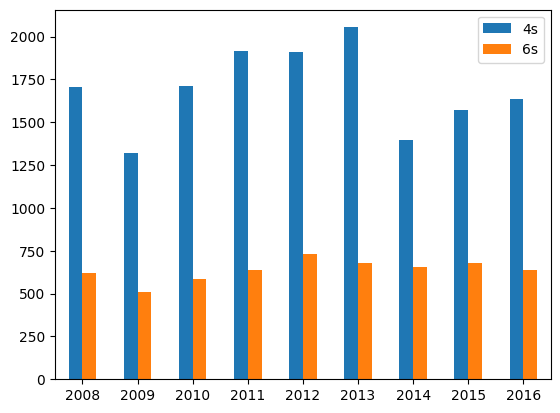

In [ ]:
fs.plot.bar(rot=0)

**2e.Runs Per Over By Teams across Seasons**

In [ ]:
mt=pd.concat([ma['team1'],ma['team2']])
mt=mt.value_counts().reset_index()
mt.columns=['Team','Total Matches']
mt['wins']=ma['winner'].value_counts().reset_index()['winner']
mt.set_index('Team',inplace=True)

<Axes: xlabel='season'>

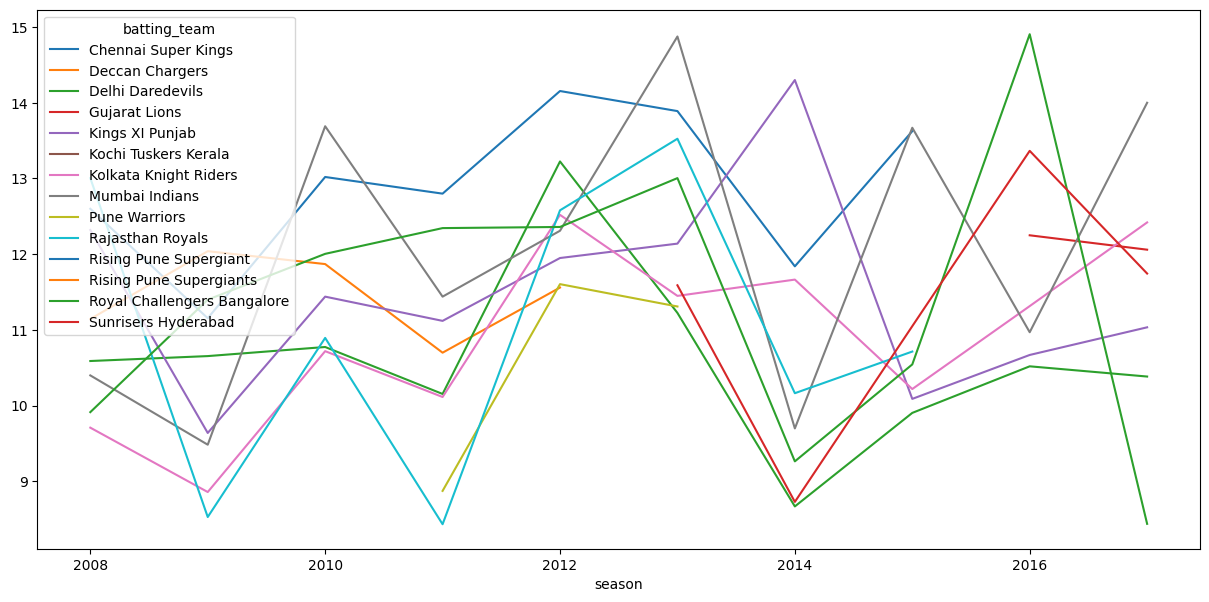

In [ ]:
runs_per_over_in_a_match=de.groupby(["batting_team","match_id"])["total_runs"].sum().reset_index().sort_values(by="match_id",ascending=True)
runs_per_over_in_a_match['total_runs']=runs_per_over_in_a_match['total_runs'].div(20)
kf=pd.DataFrame()
kf['match_id']=ma['id']
kf['season']=ma['season']
kf=pd.merge(runs_per_over_in_a_match,kf,on='match_id',how='inner')
runs_per_over_in_a_season=kf.groupby(["batting_team","season"])["total_runs"].sum().reset_index().sort_values(by="season",ascending=True)
runs_per_over_in_a_season['total_runs']=runs_per_over_in_a_season['total_runs'].div(10)
fig,ax=plt.subplots(figsize=(15,7))
runs_per_over_in_a_season.groupby(['season','batting_team']).sum()['total_runs'].unstack().plot(ax=ax)

**2f.	Maximum Man of Matches**

In [ ]:
f=ma['player_of_match'].value_counts()
f

CH Gayle           18
YK Pathan          16
DA Warner          15
AB de Villiers     15
SK Raina           14
                   ..
J Theron            1
AA Jhunjhunwala     1
WPUJC Vaas          1
AD Mathews          1
BCJ Cutting         1
Name: player_of_match, Length: 201, dtype: int64

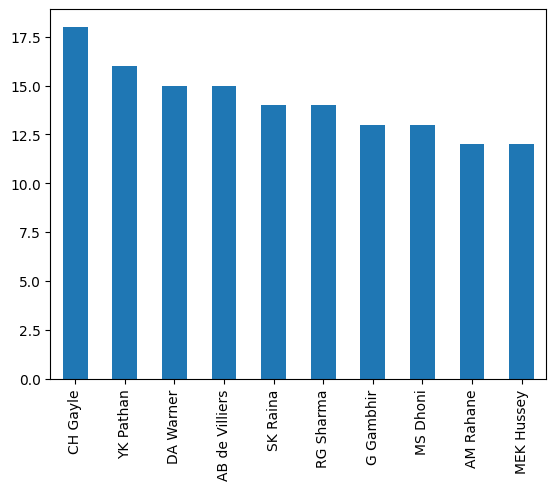

In [ ]:
top_players = ma.player_of_match.value_counts()[:10].plot(kind='bar')


**3a.Team Comparator - MI Vs CSK**

In [ ]:
def comparator(team1):
    teams=['Chennai Super Kings','Mumbai Indians']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=ma[((ma['team1']==team1)|(ma['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)

comparator('Mumbai Indians')

        Mumbai Indians  Chennai Super Kings
winner              12                    9


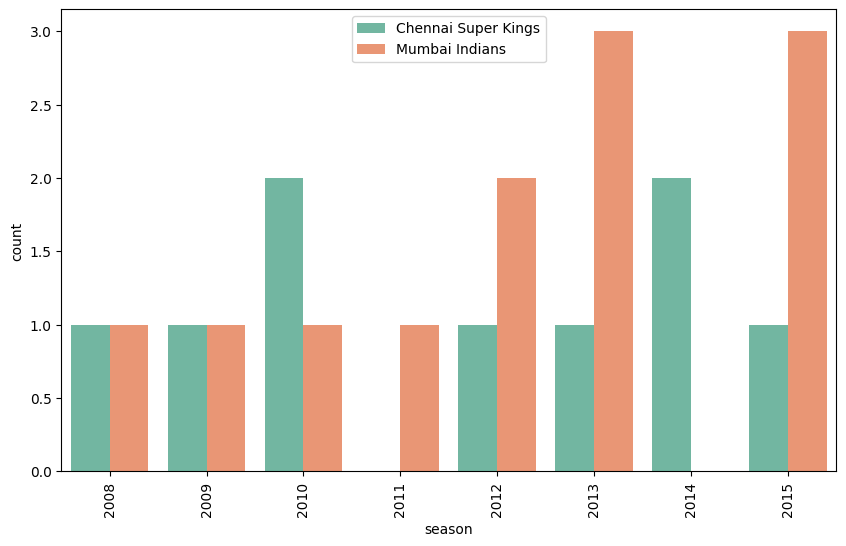

In [ ]:
def team1_vs_team2(team1,team2):
    mt1=ma[((ma['team1']==team1)|(ma['team2']==team1))&((ma['team1']==team2)|(ma['team2']==team2))]
    sb.countplot(x='season', hue='winner',data=mt1,palette='Set2')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
team1_vs_team2('Mumbai Indians','Chennai Super Kings')

**3b.	Matches Won By A Team Against Other Teams**

In [ ]:
def comparator(team1):
    teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=ma[((ma['team1']==team1)|(ma['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)

comparator('Mumbai Indians')

        Mumbai Indians  Kolkata Knight Riders
winner              16                      5
        Mumbai Indians  Chennai Super Kings
winner              12                    9
        Mumbai Indians  Rajasthan Royals
winner              10                 6
        Mumbai Indians  Deccan Chargers
winner               6                4
        Mumbai Indians  Kings XI Punjab
winner              10               10
        Mumbai Indians  Royal Challengers Bangalore
winner              13                            7
        Mumbai Indians  Delhi Daredevils
winner              11                 9
        Kochi Tuskers Kerala
winner                     1
        Mumbai Indians  Pune Warriors
winner               5              1
        Mumbai Indians  Sunrisers Hyderabad
winner               5                    4
        Rising Pune Supergiants  Mumbai Indians
winner                        1               1
        Mumbai Indians  Gujarat Lions
winner               2              

**3c.	200+ Scores**

In [ ]:
high_scores=de.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
522,259,1,Delhi Daredevils,Kings XI Punjab,231
981,486,1,Kings XI Punjab,Chennai Super Kings,231
100,50,1,Kings XI Punjab,Mumbai Indians,230
1170,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,227


**3d.	Chances of chasing 200+ target**

In [ ]:
high=de.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team                bowling_team                      
1      Chennai Super Kings         Delhi Daredevils                 1
                                   Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
                                   Sunrisers Hyderabad              2
       Deccan Chargers             Rajasthan Royals                 1
       Delhi Daredevils            Kings XI Punjab                  1
                                   Mumbai Indians                   1
                                   Rising Pune Supergiant           1
       Gujarat Lions               Delhi Daredevils                 1
       Kings XI Punjab             Chennai Super Kings              2
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      2
       Kolkata Knight Riders       Deccan Chargers                  1
                                   Kings XI Punjab                  1
                                   Royal Challengers Bangalore      1
       Mumbai Indians              Chennai Super Kings              1
                                   Delhi Daredevils                 4
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
       Rajasthan Royals            Chennai Super Kings              1
                                   Delhi Daredevils                 1
                                   Kings XI Punjab                  1
       Royal Challengers Bangalore Chennai Super Kings              1
                                   Delhi Daredevils                 1
                                   Gujarat Lions                    2
                                   Kings XI Punjab                  3
                                   Mumbai Indians                   1
                                   Pune Warriors                    1
                                   Rajasthan Royals                 1
                                   Sunrisers Hyderabad              1
       Sunrisers Hyderabad         Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      2
2      Chennai Super Kings         Kings XI Punjab                  1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
       Delhi Daredevils            Gujarat Lions                    1
       Kings XI Punjab             Chennai Super Kings              2
                                   Delhi Daredevils                 1
                                   Kolkata Knight Riders            1
                                   Sunrisers Hyderabad              1
       Kolkata Knight Riders       Kings XI Punjab                  1
       Mumbai Indians              Chennai Super Kings              1
                                   Kings XI Punjab                  1
       Rajasthan Royals            Chennai Super Kings              1
                                   Deccan Chargers                  1
                                   Mumbai Indians                   1
       Royal Challengers Bangalore Kings XI Punjab                  1
                                   Sunrisers Hyderabad              1

**4.	Batsman Comparator**

In [ ]:
def bc(b1,b2):
  ap=de[(de.batsman==b1)]['batsman_runs'].sum()
  bp=de[(de.batsman==b2)]['batsman_runs'].sum()
  if(ap>bp):
    return b1 + ' has more runs than '+ b2
  else:
    return b2 +' has more runs than '+ b1



bc('RG Sharma','V Kohli')

'V Kohli has more runs than RG Sharma'

In [ ]:
ap=de[(de.batsman=='V Kohli')]['batsman_runs'].sum()
bp=de[(de.batsman=='RG Sharma')]['batsman_runs'].sum()
if(ap>bp):
    print('V Kohli has more runs than RG Sharma')
else:
    print('RG Sharma has more runs than V Kohli	')
ap1=ap/de[(de.batsman=='V Kohli')]['over'].count()
bp1=bp/de[(de.batsman=='RG Sharma')]['over'].count()
if(ap>bp):
    print('V Kohli has more strike rate than RG Sharma')
else:
    print('RG Sharma has more strike rate than V Kohli	')

V Kohli has more runs than RG Sharma
V Kohli has more strike rate than RG Sharma


In [ ]:
balls=de.groupby(['batsman'])['ball'].count().reset_index()
runs=de.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)


In [ ]:
sixes=de.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=de.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')


In [ ]:
compare=de.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,Deccan Chargers,10
1,A Ashish Reddy,196,280,142.857143,16,15,Sunrisers Hyderabad,36
2,A Chandila,7,4,57.142857,0,0,Rajasthan Royals,4
3,A Chopra,75,53,70.666667,7,0,Kolkata Knight Riders,24
4,A Choudhary,20,25,125.000000,1,1,Royal Challengers Bangalore,15


**5a)	Top 10 Batsman**

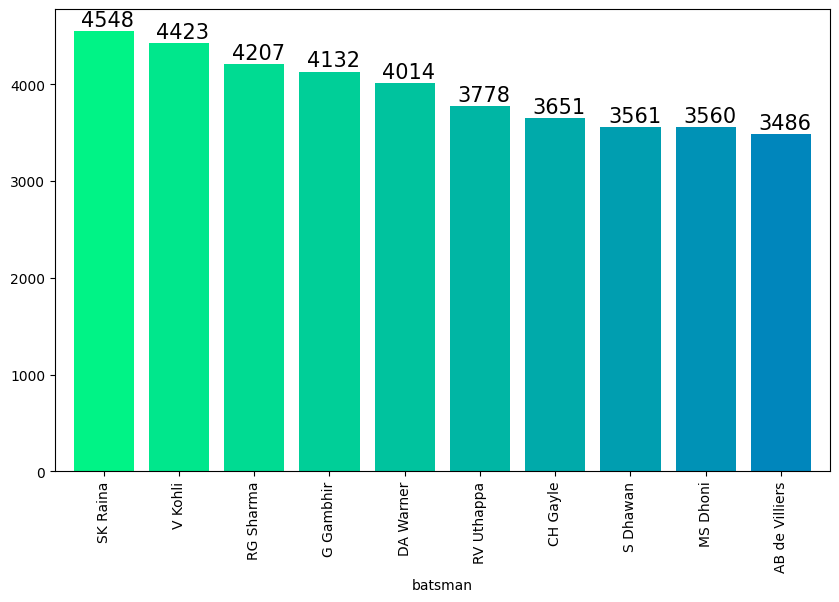

In [ ]:
plt.subplots(figsize=(10,6))
max_runs=de.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sb.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

**5b)	Top Batsman's with 1's, 2's, 3's, 4's**

In [ ]:
toppers=de.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
#Most 1's
toppers[1].sort_values(ascending=False)[:5]


batsman
V Kohli      1410.0
RG Sharma    1379.0
SK Raina     1377.0
G Gambhir    1313.0
S Dhawan     1137.0
Name: 1, dtype: float64

In [ ]:
#Most 2's
toppers[2].sort_values(ascending=False)[:5]

batsman
MS Dhoni     251.0
G Gambhir    245.0
SK Raina     242.0
V Kohli      242.0
DA Warner    207.0
Name: 2, dtype: float64

In [ ]:
#Most 4's
toppers[4].sort_values(ascending=False)[:5]

batsman
G Gambhir    484.0
SK Raina     402.0
DA Warner    401.0
S Dhawan     401.0
V Kohli      384.0
Name: 4, dtype: float64

In [ ]:
#Most 6's
toppers[6].sort_values(ascending=False)[:5]

batsman
CH Gayle     266.0
SK Raina     174.0
RG Sharma    173.0
V Kohli      160.0
DA Warner    160.0
Name: 6, dtype: float64

**5c)	Top Individual Scores**

In [ ]:
top_scores = de.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
3686,243,PC Valthaty,Kings XI Punjab,120
4223,279,V Sehwag,Delhi Daredevils,119


**5d)	Individual Scores by Top Batsman each Inning**

In [ ]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = de.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
scores

,match_id,batsman,batting_team,batsman_runs
2,1,CH Gayle,Royal Challengers Bangalore,32
3,1,DA Warner,Sunrisers Hyderabad,14
25,2,MS Dhoni,Rising Pune Supergiant,12
34,3,G Gambhir,Kolkata Knight Riders,76
37,3,SK Raina,Gujarat Lions,68
...,...,...,...,...
9495,635,SK Raina,Gujarat Lions,1
9497,636,AB de Villiers,Royal Challengers Bangalore,5
9501,636,CH Gayle,Royal Challengers Bangalore,76
9503,636,DA Warner,Sunrisers Hyderabad,69


In [ ]:
de.groupby(['inning','batsman']).sum().sort_values(['total_runs'],ascending=False)[:10]

match_id   over  ball  is_super_over  wide_runs  \
inning batsman                                                           
1      SK Raina          613957  19684  7186              0         62   
2      G Gambhir         639139  14520  7456              0         89   
1      V Kohli           714625  17976  6648              0         73   
       RG Sharma         565186  19926  6104              0         35   
2      RV Uthappa        583147  13311  5975              0         76   
1      S Dhawan          628989  13538  6560              0         71   
       MS Dhoni          491314  24444  6059              0         39   
       DA Warner         585451  11818  5400              0         55   
       AB de Villiers    496549  15901  4933              0         31   
       CH Gayle          467187   9413  4822              0         76   

                       bye_runs  legbye_runs  noball_runs  penalty_runs  \
inning batsman                                                            
1      SK Raina               0           34            6             0   
2      G Gambhir              6           58            6             0   
1      V Kohli                5           17            8             0   
       RG Sharma              0           29            4             0   
2      RV Uthappa             4           56            8             0   
1      S Dhawan               3           50            4             0   
       MS Dhoni               9           40            6             0   
       DA Warner              4           28           13             0   
       AB de Villiers        14           26            6             0   
       CH Gayle              13           34            8             0   

                       batsman_runs  extra_runs  total_runs  
inning batsman                                               
1      SK Raina                2647         102        2749  
2      G Gambhir               2433         159        2592  
1      V Kohli                 2391         103        2494  
       RG Sharma               2344          68        2412  
2      RV Uthappa              2262         144        2406  
1      S Dhawan                2262         128        2390  
       MS Dhoni                2232          94        2326  
       DA Warner               2118         100        2218  
       AB de Villiers          2128          77        2205  
       CH Gayle                2003         131        2134

**6a)	Highest Wicket Taker**

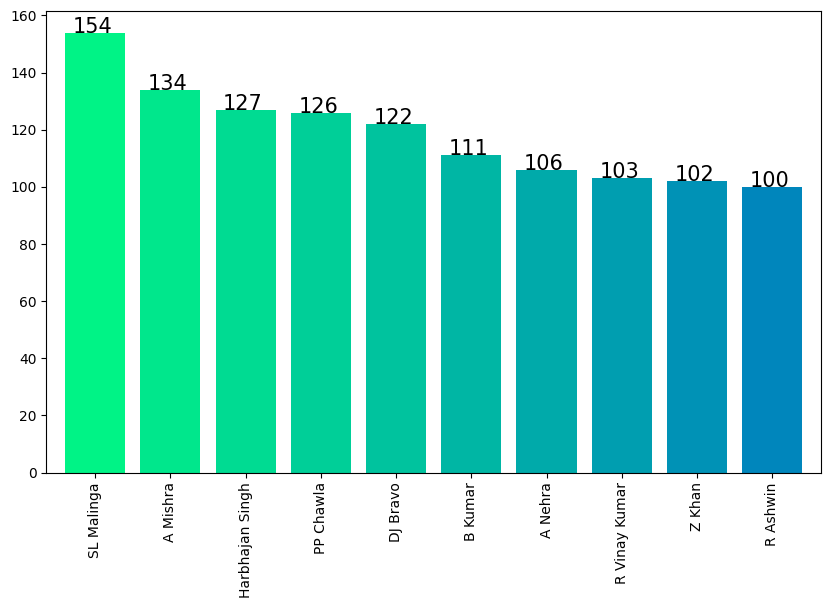

In [ ]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=de[de["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sb.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
plt.show()

**6b)	Maximum Overs**

In [ ]:
eco=de.groupby(['bowler']).sum()
eco['total balls']=de['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432


**6c)	Most Economical Bowlers with 300+ overs**

In [ ]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,SP Narine,R Ashwin,DW Steyn,SL Malinga,Harbhajan Singh,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
economy,6.395706,6.493639,6.615599,6.757238,6.933735,7.046784,7.344444,7.404321,7.546174,7.612756


**6d)	Highest Dismissals for a Batsman by a Bowler**

In [ ]:
dismissed=de[de['dismissal_kind']!='runout'][de['dismissal_kind']!='No dismissal'][de['player_dismissed']!='No player']
dismiss=dismissed.groupby(['player_dismissed','bowler']).size().reset_index()
dismiss.rename(columns={dismiss.columns[2]:'size'},inplace=True)
dismiss
dismiss.sort_values(by='size',ascending=False)[:10]

,player_dismissed,bowler,size
3800,None,Harbhajan Singh,2853
3689,None,A Mishra,2561
3901,None,P Kumar,2535
3977,None,SL Malinga,2524
3912,None,PP Chawla,2461
3917,None,R Ashwin,2249
4038,None,Z Khan,2157
3786,None,DW Steyn,2059
3927,None,R Vinay Kumar,2036
3806,None,IK Pathan,2014


**7a)	1 wicket keeper**

In [ ]:
w=de[de['dismissal_kind'].isin(['stumped'])]
r=de[de['dismissal_kind'].isin(['caught'])]
d=de[de['dismissal_kind'].isin(['run out'])]
wk_1=w.groupby(['fielder'])['dismissal_kind'].value_counts().sort_values(ascending=False)[:1]
wk_2=r.groupby(['fielder'])['dismissal_kind'].value_counts().sort_values(ascending=False)[:1]
wk_3=d.groupby(['fielder'])['dismissal_kind'].value_counts().sort_values(ascending=False)[:1]
print(wk_1,wk_2,wk_3)


fielder     dismissal_kind
RV Uthappa  stumped           32
Name: dismissal_kind, dtype: int64 fielder     dismissal_kind
KD Karthik  caught            88
Name: dismissal_kind, dtype: int64 fielder   dismissal_kind
MS Dhoni  run out           20
Name: dismissal_kind, dtype: int64


**7b)	3-5 Batsman**

In [ ]:
scores.groupby(['batsman']).max().nlargest(4,'batsman_runs')

,match_id,batting_team,batsman_runs
batsman,,,
CH Gayle,636,Royal Challengers Bangalore,175
AB de Villiers,636,Royal Challengers Bangalore,133
DA Warner,636,Sunrisers Hyderabad,126
V Kohli,636,Royal Challengers Bangalore,113


**7c)	1-3 All rounder**

In [ ]:
all_bowlers=list(set(de['bowler']))
all_batsmen=list(set(de['batsman']))
allrounders=list(set(de['bowler']).intersection(set(de['batsman'])))
allrounders_data=de[(de['batsman'].isin(allrounders) | de['bowler'].isin(allrounders))][['over','ball','batsman','batsman_runs','bowler','total_runs','player_dismissed','dismissal_kind','fielder']]

**7d)	3-5 Bowlers**

In [ ]:
bowl=de.groupby(['bowler','dismissal_kind'])['penalty_runs'].sum().reset_index()
bowl=bowl[bowl['dismissal_kind']!='No dismissal'][bowl['dismissal_kind']!='runout']
bowl.groupby('bowler').count()['dismissal_kind'].reset_index().nlargest(3,'dismissal_kind')

,bowler,dismissal_kind
117,Harbhajan Singh,8
163,KV Sharma,8
4,A Kumble,7


**ACCURACY METRICS**

In [ ]:
ma.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)


In [ ]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}


In [ ]:
ma.replace(encode, inplace=True)

In [ ]:
ma['toss_decision']=ma['toss_decision'].map({'field':0,'bat':1})
ma['result']=ma['result'].map({'normal':0,'tie':1,'no result':3})
ma=ma.drop((['player_of_match','venue','city','date','umpire1','umpire2']),axis=1)


In [ ]:
x1=ma.drop(['winner'],axis=1)
y1=ma['winner']
y1=y1.astype('int')

**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:
random_forest=RandomForestClassifier(n_estimators=30,max_depth=20)
random_forest.fit(x1_train,y1_train)

RandomForestClassifier(max_depth=20, n_estimators=30)

In [ ]:
y1_pred=random_forest.predict(x1_test)
acc_score=metrics.accuracy_score(y1_test,y1_pred)
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.7925531914893617


In [ ]:
y1_pred_train=random_forest.predict(x1_train)
acc_score = metrics.accuracy_score(y1_train,y1_pred_train)
print("Accuracy of Train:", acc_score)


Accuracy of Train: 1.0
